In [ ]:
from __future__ import print_function
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
from src.utils import listdir
from src.neural_transfer import image_loader, imshow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 256 if torch.cuda.is_available() else 128  # use small size if no gpu

In [ ]:
# Load input images
conditions = ["face", "scene", "bodypart", "object"]
condition_imgs = {c: [] for c in conditions}
for condition in conditions:
    stim_path = "../stimuli/" + condition
    images = listdir(stim_path)
    condition_imgs[condition] = [img.split('/')[-1] for img in images]
#     for im in images:
#         img = image_loader(im, imsize, device)
#         plt.figure()
#         imshow(img, title=im)

Content / Style / Output


/tmp/ipykernel_69099/1038009831.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axarr = plt.subplots(1,3)


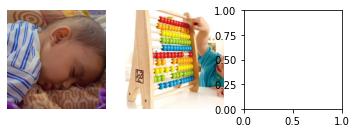

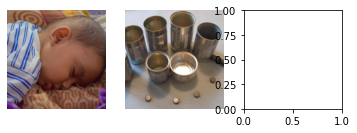

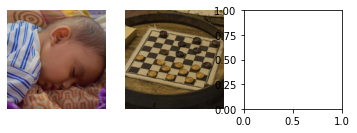

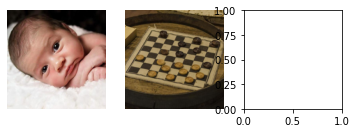

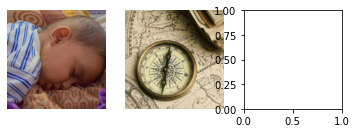

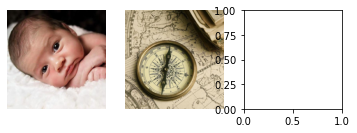

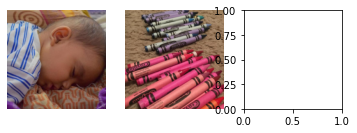

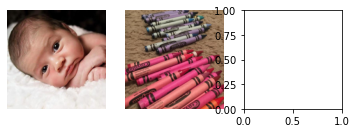

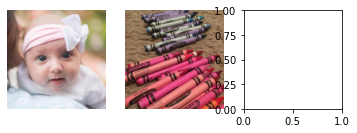

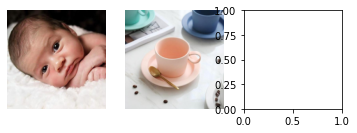

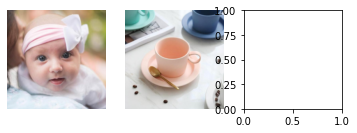

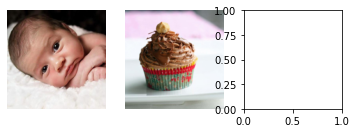

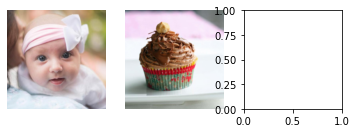

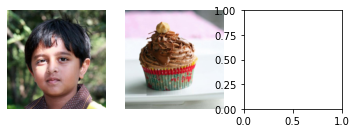

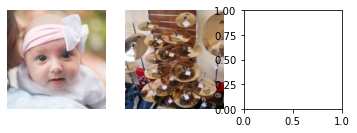

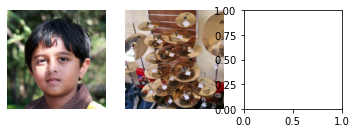

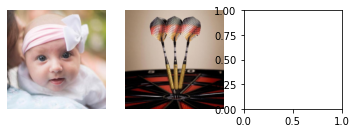

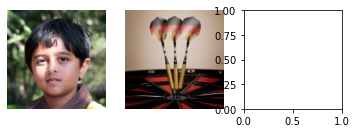

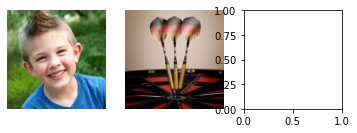

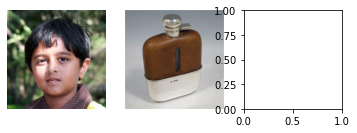

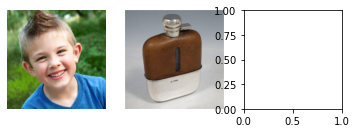

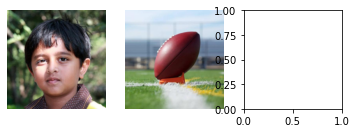

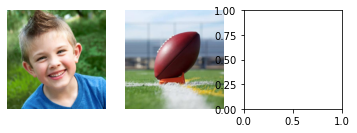

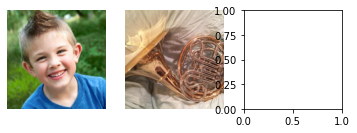

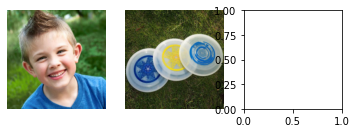

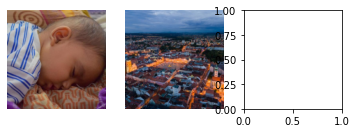

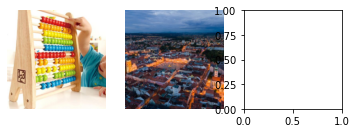

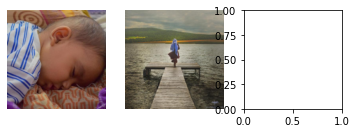

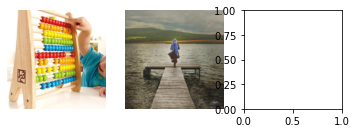

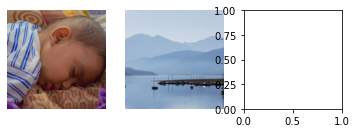

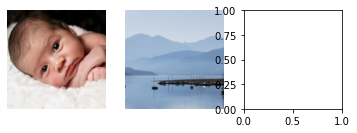

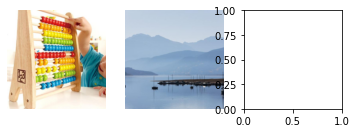

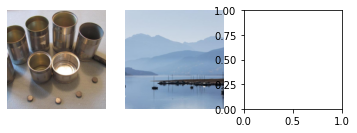

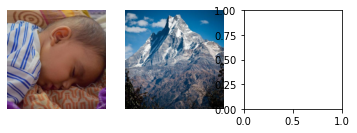

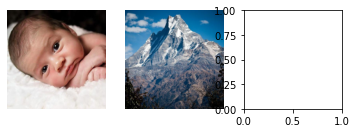

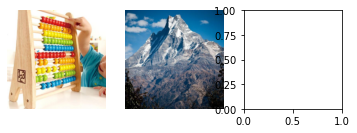

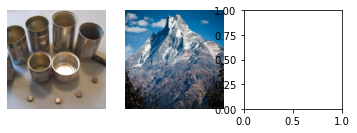

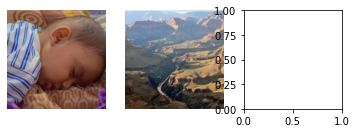

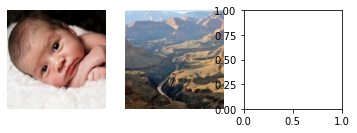

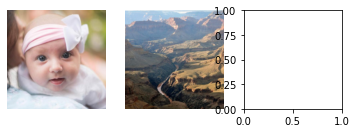

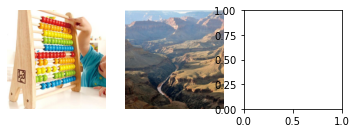

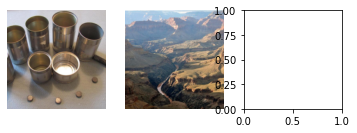

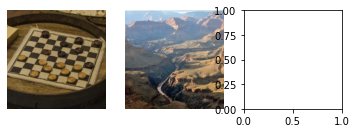

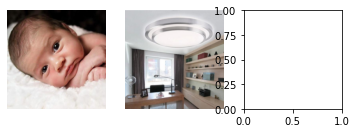

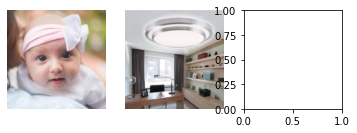

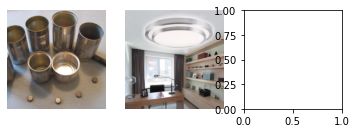

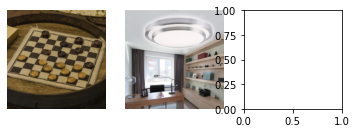

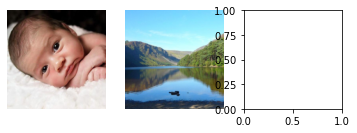

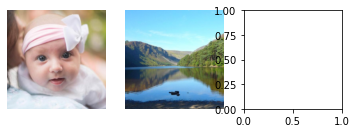

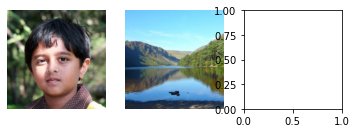

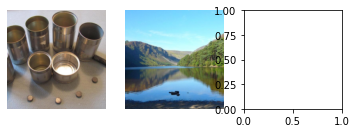

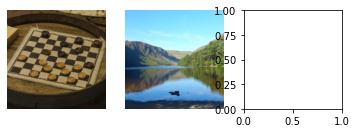

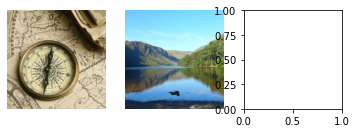

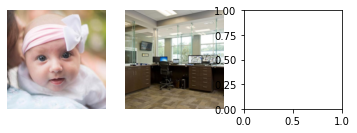

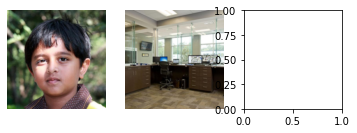

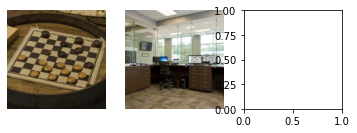

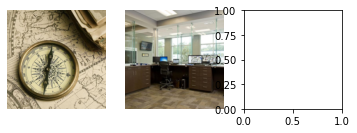

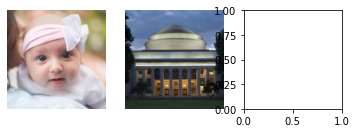

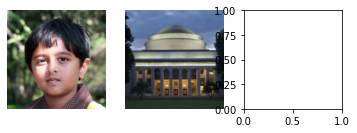

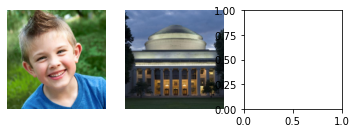

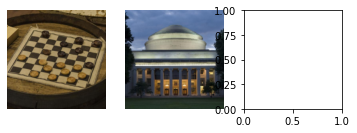

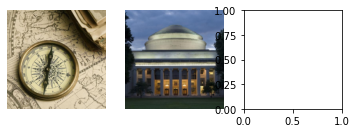

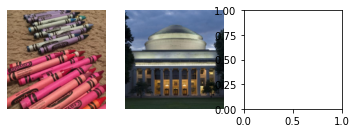

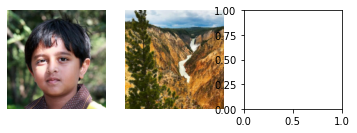

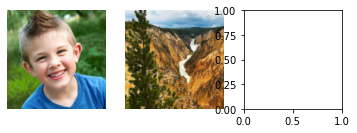

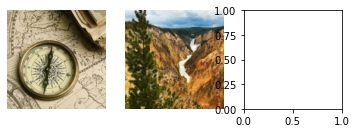

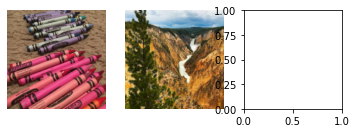

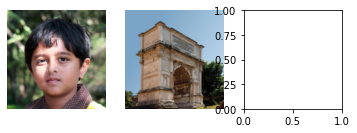

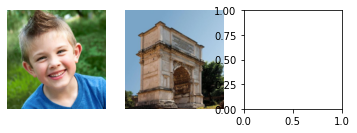

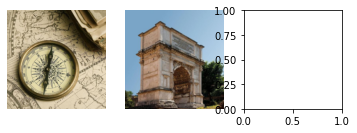

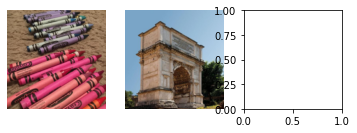

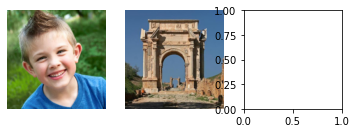

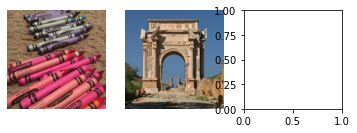

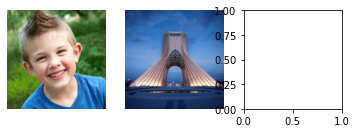

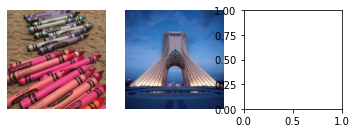

In [69]:
result_path = "../results/adversary"
results = [item.split('/')[-1] for item in listdir(result_path) if ".pt" in item]
style_file = []
content_file = []
style_condition = []
content_condition = []
print("Content / Style / Output")
for result in results:
    checkpoint = torch.load(os.path.join(result_path, result))
    run = checkpoint['run']
    loss = checkpoint['loss']
    style_score = checkpoint['style_score']
    content_score = checkpoint['content_score']
    output = checkpoint['input_img']
    
    f, axarr = plt.subplots(1,3)
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    if result.split('_')[1] != content_file:
        content_file = result.split('_')[1]
        condition_key = [list(condition_imgs.values()).index(l) for l in list(condition_imgs.values()) if content_file in l]
        content_condition = list(condition_imgs.keys())[condition_key[0]]
        content_img = image_loader("../stimuli/" + content_condition + "/" + content_file, imsize, device)
        content_img = content_img.cpu().squeeze()
        content_img = np.swapaxes(content_img, 0, 1)
        content_img = np.swapaxes(content_img, 1, 2)
        
    axarr[0].imshow(content_img)# content_img, title="Content: " + content_condition + " (" + content_file + ")")
    style_file = result.split('_')[0]
    condition_key = [list(condition_imgs.values()).index(l) for l in list(condition_imgs.values()) if style_file in l]
    style_condition = list(condition_imgs.keys())[condition_key[0]]
    style_img = image_loader("../stimuli/" + style_condition + "/" + style_file, imsize, device)

    #f.suptitle("Style: " + style_condition + " (" + style_file + ")")
    style_img = style_img.cpu().squeeze()
    style_img = np.swapaxes(style_img, 0, 1)
    style_img = np.swapaxes(style_img, 1, 2)
    axarr[1].imshow(style_img)
    output = output.cpu().squeeze()
    output = np.swapaxes(output, 0, 1)
    output = np.swapaxes(output, 1, 2)
    axarr[2].imshow(output)

In [ ]:
# Load checkpoint image
# content_imgs = ["stim026.bmp", "stim027.bmp", "stim028.bmp", "stim029.bmp", "stim030.bmp"]
# content_imgs2 = ["stim051.bmp", "stim052.bmp", "stim053.bmp", "stim054.bmp", "stim055.bmp"]
style_conditions = ["face", "scene", "scene", "object"]
content_conditions = ["scene", "face", "object", "face"]

# style_condition = "object"
# content_condition = "face"

for style_condition, content_condition in zip(style_conditions, content_conditions):
    
    style_imgs = condition_imgs[style_condition]
    content_imgs = condition_imgs[content_condition]

    img = image_loader("../stimuli/" + content_condition + "/" + content_img, imsize, device)
    plt.figure()
    imshow(img, title="Content")
    for content_img in content_imgs:
        for style_img in style_imgs:
            try:
                checkpoint = torch.load("../results/adversary/" + style_img + "_" +
                                        content_img + "_pool_5.pt")
                output_run = checkpoint['run']
                output_loss = checkpoint['loss']
                output_style = checkpoint['style_score']
                output_content = checkpoint['content_score']
                output = checkpoint['input_img']
            #     with torch.no_grad():
            #         output.clamp_(0, 1)

            #     output_BGR = output.requires_grad_(False)
            #     output = output_BGR[:, (2, 1, 0), :, :]

                print(output_run, output_loss, output_style, output_content)
                plt.figure()
                imshow(output)

                img = image_loader("../stimuli/" + style_condition + "/" + style_img, imsize, device)
                plt.figure()
                imshow(img)
            except FileNotFoundError:
                continue


In [ ]:
# Load numpy output images
style_condition = "face"
content_img = "stim076.bmp"
style_imgs = condition_imgs[style_condition]

for style_img in style_imgs:
    img = np.load("../results/adversary/" + style_img + "_stim076.bmp_pool_5_3000.npy")[
        0, :, :, :
    ]
    img = np.swapaxes(img, 0, 1)
    img = np.swapaxes(img, 1, 2)
    plt.figure()
    plt.imshow(img)
    
    img = image_loader("../stimuli/" + style_condition + "/" + style_img, imsize, device)
    plt.figure()
    imshow(img, title=im)